In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

In [243]:
PRODUCTION_DATASET = f"../udataset/meat/production.csv"

In [244]:
production_df = pd.read_csv(PRODUCTION_DATASET)
production_df = pd.melt(production_df, id_vars=['DateTime'], value_vars=production_df.columns.to_list()[1:])
production_df = production_df[production_df['DateTime'].str.contains(r'-01')]
production_df['DateTime'] = production_df['DateTime'].str.slice(0,4)
production_df['DateTime'] = production_df['DateTime'].astype(int)
production_df.columns = ['Year', 'Animal', 'Production']
production_df

,Year,Animal,Production
0,1921,Beef,3.580000e+08
12,1922,Beef,3.530000e+08
24,1923,Beef,3.910000e+08
36,1924,Beef,4.130000e+08
48,1925,Beef,4.410000e+08
...,...,...,...
10848,2019,Poultry,4.205100e+09
10860,2020,Poultry,4.450400e+09
10872,2021,Poultry,4.124100e+09
10884,2022,Poultry,4.160500e+09


In [245]:
POPULATION_DATASET = f"../udataset/population_by_state.csv"

In [246]:
population_df = pd.read_csv(POPULATION_DATASET)
# population_df = pd.melt(population_df, id_vars=['DateTime'], value_vars=production_df.columns.to_list()[1:])
population_df

,State,Year,Population
0,alabama,1900,1830000
1,alabama,1901,1907000
2,alabama,1902,1935000
3,alabama,1903,1957000
4,alabama,1904,1978000
...,...,...,...
6219,wyoming,2019,580116
6220,wyoming,2020,577664
6221,wyoming,2021,579548
6222,wyoming,2022,581629


In [247]:
yearly_pop = population_df.groupby('Year')['Population'].sum().reset_index()
yearly_pop

,Year,Population
0,1900,76095000
1,1901,77588000
2,1902,79160000
3,1903,80631000
4,1904,82165000
...,...,...
119,2019,328329953
120,2020,331526933
121,2021,332048977
122,2022,333271411


In [249]:
merged_df = pd.merge(production_df, yearly_pop, left_on='Year', right_on='Year', how='left')

In [250]:
merged_df['Production per capita'] = merged_df['Production'] / merged_df['Population']
merged_df

,Year,Animal,Production,Population,Production per capita
0,1921,Beef,3.580000e+08,108540000,3.298323
1,1922,Beef,3.530000e+08,110054000,3.207516
2,1923,Beef,3.910000e+08,111950000,3.492631
3,1924,Beef,4.130000e+08,114117000,3.619093
4,1925,Beef,4.410000e+08,115829000,3.807337
...,...,...,...,...,...
904,2019,Poultry,4.205100e+09,328329953,12.807543
905,2020,Poultry,4.450400e+09,331526933,13.423947
906,2021,Poultry,4.124100e+09,332048977,12.420156
907,2022,Poultry,4.160500e+09,333271411,12.483819


In [251]:
events = {
    '1990-01': 'Early 90s Recession',
    '2001-03': 'Dot-com Bubble Burst',
    '2003-05': 'BSE Outbreak',
    '2008-01': 'Global Financial Crisis',
    '2019-12': 'CoViD-19 Pandemic',
    '2012-01': 'Droughts'
}

# Convert years to datetime for plotting
event_dates = pd.to_datetime([f'{year}-01' for year in events.keys()])

In [252]:
MEAT = 'Beef'
meat_df = merged_df[merged_df['Animal'] == MEAT]
meat_df

,Year,Animal,Production,Population,Production per capita
0,1921,Beef,3.580000e+08,108540000,3.298323
1,1922,Beef,3.530000e+08,110054000,3.207516
2,1923,Beef,3.910000e+08,111950000,3.492631
3,1924,Beef,4.130000e+08,114117000,3.619093
4,1925,Beef,4.410000e+08,115829000,3.807337
...,...,...,...,...,...
96,2019,Beef,2.278700e+09,328329953,6.940274
97,2020,Beef,2.356800e+09,331526933,7.108925
98,2021,Beef,2.271800e+09,332048977,6.841762
99,2022,Beef,2.228900e+09,333271411,6.687942


In [253]:
meat_df = meat_df[meat_df['Year'] >= 1983]
meat_df['Year'] = meat_df['Year'].astype(str)
meat_df['Year'] = meat_df['Year'] + "-01-01"
meat_df

/tmp/ipykernel_22485/3899648014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_df['Year'] = meat_df['Year'].astype(str)
/tmp/ipykernel_22485/3899648014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_df['Year'] = meat_df['Year'] + "-01-01"


,Year,Animal,Production,Population,Production per capita
60,1983-01-01,Beef,1.837000e+09,233791992,7.857412
61,1984-01-01,Beef,1.830000e+09,235824901,7.759995
62,1985-01-01,Beef,1.989000e+09,237923795,8.359820
63,1986-01-01,Beef,2.070000e+09,240132883,8.620227
64,1987-01-01,Beef,2.038000e+09,242288918,8.411445
65,1988-01-01,Beef,1.895000e+09,244498983,7.750543
66,1989-01-01,Beef,1.852000e+09,246819230,7.503467
67,1990-01-01,Beef,1.890000e+09,249464396,7.576231
68,1991-01-01,Beef,1.927000e+09,252153092,7.642183
69,1992-01-01,Beef,1.998000e+09,255029699,7.834382


In [254]:
plt.figure(figsize=(16, 8))

x = pd.to_datetime(meat_df['Year'])

y = seasonal_decompose(meat_df['Production per capita'], model='additive', period=12).trend


<Figure size 1600x800 with 0 Axes>

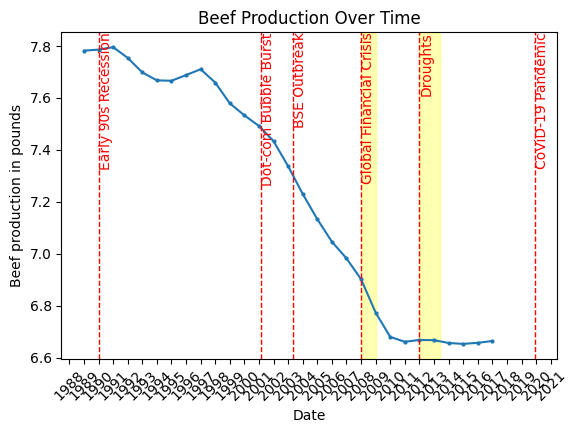

In [256]:


plt.plot(x, y, marker='o', linestyle='-', markersize=2)
plt.title(f'{MEAT} Production Over Time')
plt.xlabel('Date')
plt.ylabel(f'{MEAT} production in pounds')

# Adding vertical lines and labels for each event
for date, event in zip(event_dates, events.values()):
    plt.axvline(x=date, color='r', linestyle='--', linewidth=1)
    plt.text(date, plt.ylim()[1], event, rotation=90, verticalalignment='top', color='red')

plt.axvspan(pd.to_datetime('2008-01-01'), pd.to_datetime('2008-12-31'), color='yellow', alpha=0.3)
plt.axvspan(pd.to_datetime('2012-01-01'), pd.to_datetime('2013-06-01'), color='yellow', alpha=0.3)

# Formatting the x-axis to show labels only for the first month of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate(ha='center', rotation=45)  # Rotate date labels to prevent overlap

plt.show()